<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
      DataSet: CIFAR10 from inbuilt in Keras
      Deep learning Framework: Tensorflow with Keras
      Deep learning Method: custom CNN with Fully Connected 
      Optimizer:ADAM with 0.001
      Results: 86 to 88% Accurate
      Total Parameters : 309,290 parameter
      Total Convolution Layer : 6

```
#### Done by shriarul643@gmail.com

In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(trainData,trainLabel),(testData,testLabel) = cifar10.load_data()
TestData = testData;

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(trainData.shape)
print(testData.shape)
print(trainLabel.shape)
print(testLabel.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)
print(trainLabel.shape)
print(testLabel.shape)

(50000, 10)
(10000, 10)


In [5]:
trainData = trainData.astype('float32')/255
testData = testData.astype('float32')/255


In [6]:
mean = np.mean(trainData)
std = np.std(trainData)
trainData = (trainData-mean)/(std+1e-7)

In [7]:
mean = np.mean(testData)
std = np.std(testData)
testData = (testData-mean)/(std+1e-7)

In [8]:
TargetLabels = [
'airplane',										
'automobile',										
'bird',										
'cat',							
'deer',									
'dog',								
'frog',								
'horse',										
'ship',										
'truck']

In [9]:
model = Sequential([Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4),input_shape=(32,32,3)),
                    BatchNormalization(),
                    Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    MaxPool2D(),
                    Dropout(0.2),
                    Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    MaxPool2D(),
                    Dropout(0.3),
                    Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=l2(1e-4)),
                    BatchNormalization(),
                    MaxPool2D(),
                    Dropout(0.4),
                    Flatten(),
                    Dense(10,activation='softmax')
                    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [11]:
opt = Adam(0.0004)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
earlystopping = EarlyStopping(monitor='val_loss',patience=30)

In [13]:
H = model.fit(trainData,trainLabel,batch_size=64,callbacks=[earlystopping],epochs=125,validation_data=(testData,testLabel))

Epoch 1/125
782/782 [==============================] - 24s 21ms/step - loss: 2.4752 - accuracy: 0.3393 - val_loss: 1.3276 - val_accuracy: 0.5453
Epoch 2/125
782/782 [==============================] - 16s 20ms/step - loss: 1.3721 - accuracy: 0.5509 - val_loss: 1.0128 - val_accuracy: 0.6582
Epoch 3/125
782/782 [==============================] - 16s 21ms/step - loss: 1.0665 - accuracy: 0.6474 - val_loss: 0.9059 - val_accuracy: 0.7013
Epoch 4/125
782/782 [==============================] - 16s 20ms/step - loss: 0.9228 - accuracy: 0.6928 - val_loss: 0.8464 - val_accuracy: 0.7207
Epoch 5/125
782/782 [==============================] - 16s 20ms/step - loss: 0.8322 - accuracy: 0.7240 - val_loss: 0.7397 - val_accuracy: 0.7558
Epoch 6/125
782/782 [==============================] - 16s 20ms/step - loss: 0.7499 - accuracy: 0.7529 - val_loss: 0.7533 - val_accuracy: 0.7587
Epoch 7/125
782/782 [==============================] - 16s 20ms/step - loss: 0.7027 - accuracy: 0.7702 - val_loss: 0.6900 - val_ac

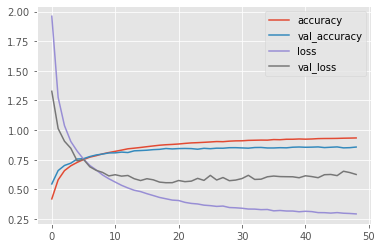

In [14]:
plt.style.use('ggplot')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['val_accuracy'],label='val_accuracy')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['loss'],label='loss')
plt.plot(np.arange(0,np.max(H.epoch)+1),H.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## The model is clearly overfitting but we have a result of about 85 to 90%

In [15]:
predicted = model.predict(testData)
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1),target_names=TargetLabels))

              precision    recall  f1-score   support

    airplane       0.89      0.86      0.87      1000
  automobile       0.95      0.92      0.93      1000
        bird       0.84      0.77      0.81      1000
         cat       0.74      0.69      0.72      1000
        deer       0.81      0.89      0.85      1000
         dog       0.80      0.79      0.79      1000
        frog       0.84      0.93      0.88      1000
       horse       0.89      0.89      0.89      1000
        ship       0.89      0.93      0.91      1000
       truck       0.92      0.90      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



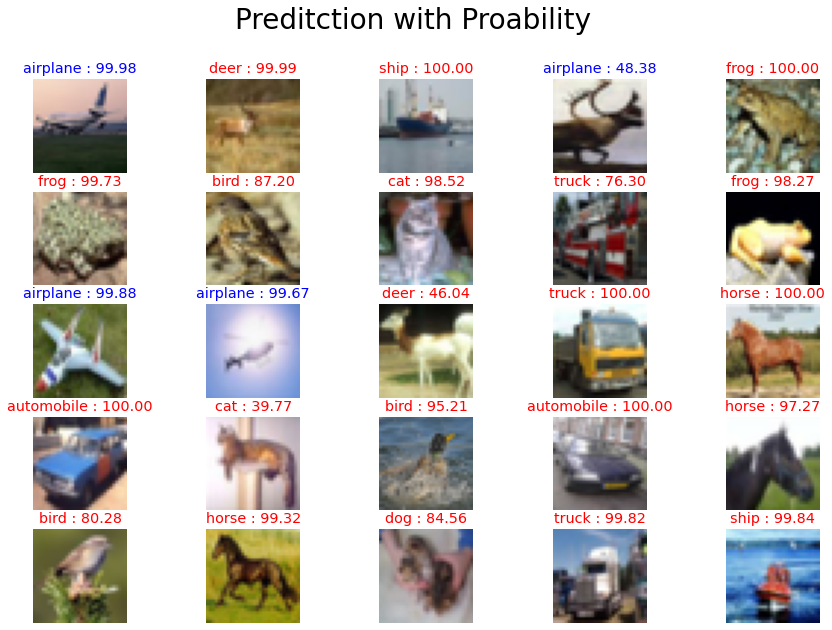

In [32]:
fig  = plt.figure(figsize=(15,10))
RandomIndex = np.random.randint(0,testData.shape[0],size=(25,))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(TestData[j],cmap=plt.cm.binary)
  plt.axis('off')
  predictedLabel = predicted[j].argmax()
  actualLabel = testLabel[j].argmax()
  if actualLabel == predictedLabel :
    color = 'blue'
  else:
    color = 'red'
  plt.title('{} : {:.2f}'.format(TargetLabels[predictedLabel],predicted[j].max()*100),color=color)

plt.suptitle('Preditction with Proability',fontsize=28)
plt.show()